## Project Phase 2 - Preprocessing Pipelines

#### Import Modules

In [1]:
from pathlib import Path
import os
import sys
import time
import warnings

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/leon/Documents/Repos/Gesture-Recognition-Reading-Muscle-Activity


In [3]:
import utils.processing as processing
import utils.general_utils as general

#### Set up to time script run time

In [4]:
start = time.time()

#### Configuration

In [5]:
DESIGN_FILE_PATH = 'data/emg_design.csv'
TARGET_ATTR = 'gesture class (0-3)'
MISSING_THRESHOLD = 0.20
RANDOM_STATE = 42

In [6]:
warnings.filterwarnings("ignore", "use_inf_as_na")

#### Import Data File

In [7]:
df = pd.read_csv(DESIGN_FILE_PATH)
print(df.shape)
df.head()

(11678, 65)


,id,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,...,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


#### A. Identify attributes with missing value count greater than a predefined threshold.


In [8]:
missing_attrs = processing.identify_missing_attrs(df, missing_threshold=MISSING_THRESHOLD)
missing_attrs

[]

#### B. Identify non-machinelearning attributes.

In [9]:
concern_list = general.check_for_complete_unique_attrs(df)
concern_list

the data frame has 11678 rows

id has 11678 unique values and is dtype int64 examine more closely
muscle reading 1 sensor 1 has 191 unique values and is dtype float64 
muscle reading 1 sensor 2 has 154 unique values and is dtype float64 
muscle reading 1 sensor 3 has 61 unique values and is dtype float64 
muscle reading 1 sensor 4 has 102 unique values and is dtype float64 
muscle reading 1 sensor 5 has 161 unique values and is dtype float64 
muscle reading 1 sensor 6 has 213 unique values and is dtype float64 
muscle reading 1 sensor 7 has 246 unique values and is dtype float64 
muscle reading 1 sensor 8 has 177 unique values and is dtype float64 
muscle reading 2 sensor 1 has 184 unique values and is dtype float64 
muscle reading 2 sensor 2 has 149 unique values and is dtype float64 
muscle reading 2 sensor 3 has 62 unique values and is dtype float64 
muscle reading 2 sensor 4 has 97 unique values and is dtype float64 
muscle reading 2 sensor 5 has 159 unique values and is dtype floa

['id']

In [10]:
non_ml_attrs = ['id']

#### C. Identify attributes to drop from machine learning.

In [11]:
ml_drop_attrs = []

#### D. Establish numerical and nominal attributes.

In [12]:
numerical_attrs, nominal_attrs = processing.split_numerical_nominal(df)
print("numerical_attrs: ", numerical_attrs)
print("nominal_attrs: ", nominal_attrs)

numerical_attrs:  ['id', 'muscle reading 1 sensor 1', 'muscle reading 1 sensor 2', 'muscle reading 1 sensor 3', 'muscle reading 1 sensor 4', 'muscle reading 1 sensor 5', 'muscle reading 1 sensor 6', 'muscle reading 1 sensor 7', 'muscle reading 1 sensor 8', 'muscle reading 2 sensor 1', 'muscle reading 2 sensor 2', 'muscle reading 2 sensor 3', 'muscle reading 2 sensor 4', 'muscle reading 2 sensor 5', 'muscle reading 2 sensor 6', 'muscle reading 2 sensor 7', 'muscle reading 2 sensor 8', 'muscle reading 3 sensor 1', 'muscle reading 3 sensor 2', 'muscle reading 3 sensor 3', 'muscle reading 3 sensor 4', 'muscle reading 3 sensor 5', 'muscle reading 3 sensor 6', 'muscle reading 3 sensor 7', 'muscle reading 3 sensor 8', 'muscle reading 4 sensor 1', 'muscle reading 4 sensor 2', 'muscle reading 4 sensor 3', 'muscle reading 4 sensor 4', 'muscle reading 4 sensor 5', 'muscle reading 4 sensor 6', 'muscle reading 4 sensor 7', 'muscle reading 4 sensor 8', 'muscle reading 5 sensor 1', 'muscle reading 5 

#### E. Establish machine learning attribute configuration using the A, B and C.

In [13]:
ml_ignore_list = missing_attrs + non_ml_attrs + ml_drop_attrs
print(f'\nml_ignore_list: {ml_ignore_list}')

numerical_attrs = [attr for attr in numerical_attrs if attr not in ml_ignore_list]
nominal_attrs = [attr for attr in nominal_attrs if attr not in ml_ignore_list]

assert(df.shape[1] == len(ml_ignore_list) + len(numerical_attrs) + len(nominal_attrs))


ml_ignore_list: ['id']


#### F. Check out the missingness of the machine learning attributes.

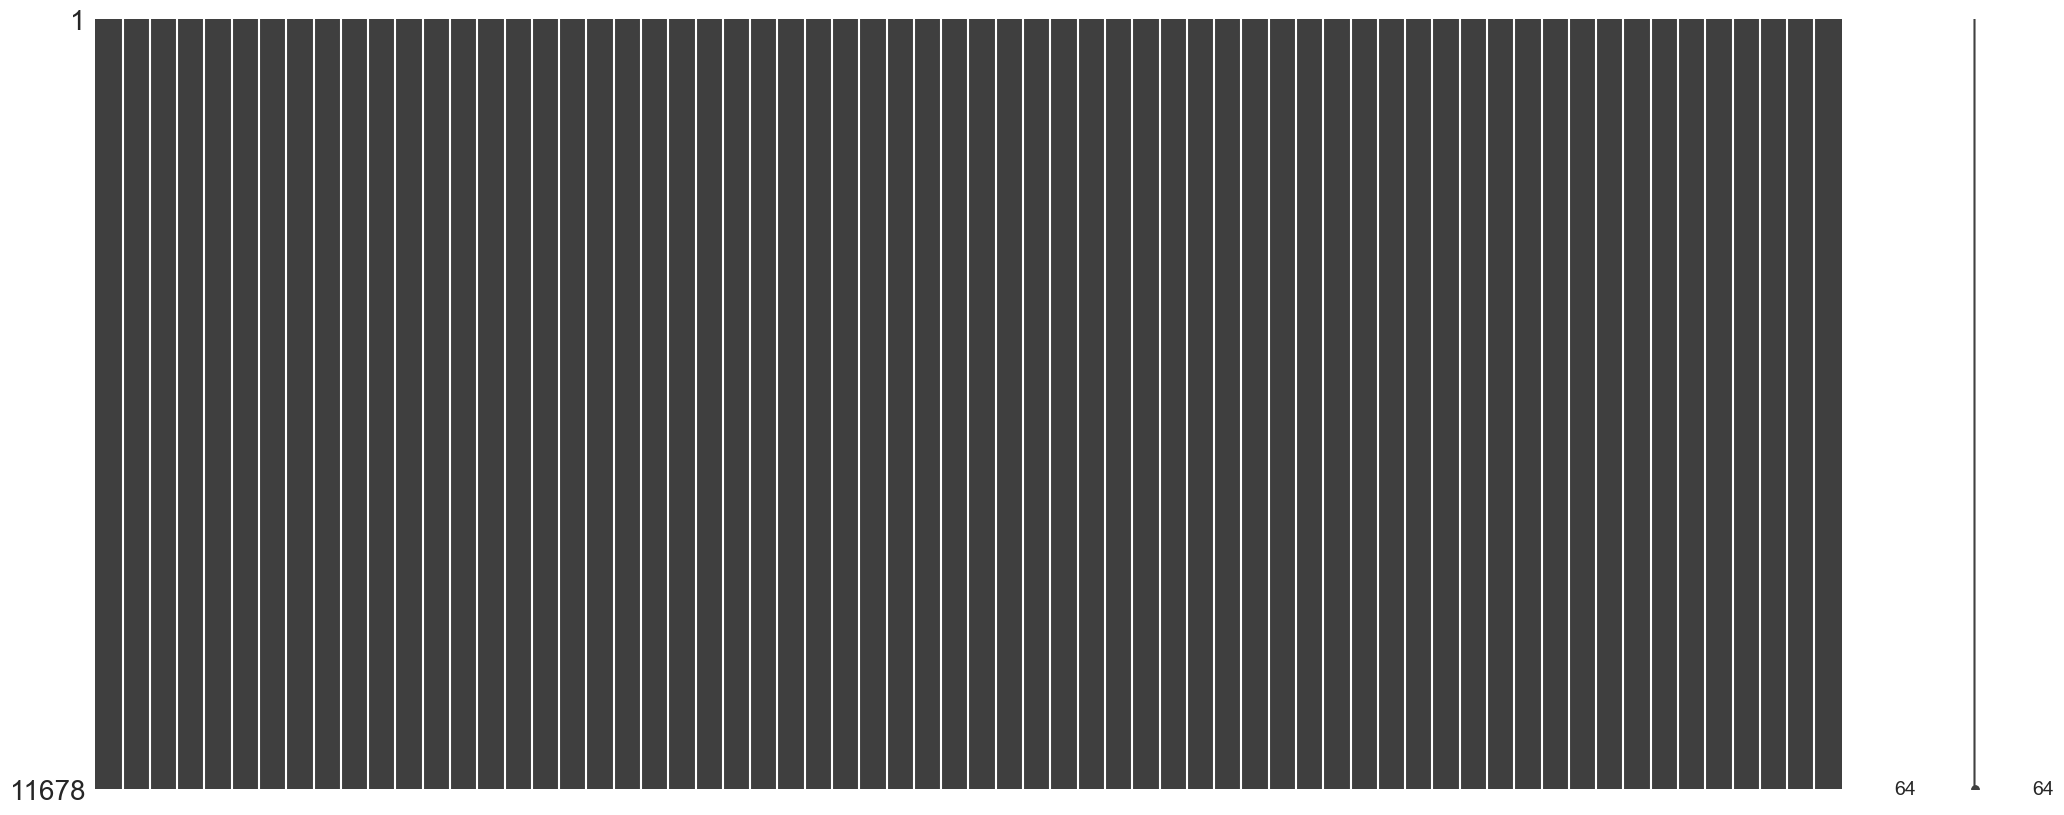

In [14]:
msno.matrix(df[numerical_attrs + nominal_attrs])
plt.show()

#### G. Checkout the types of the machine learning attributes.

In [15]:
df[numerical_attrs + nominal_attrs].dtypes

muscle reading 1 sensor 1    float64
muscle reading 1 sensor 2    float64
muscle reading 1 sensor 3    float64
muscle reading 1 sensor 4    float64
muscle reading 1 sensor 5    float64
                              ...   
muscle reading 8 sensor 4    float64
muscle reading 8 sensor 5    float64
muscle reading 8 sensor 6    float64
muscle reading 8 sensor 7    float64
muscle reading 8 sensor 8    float64
Length: 64, dtype: object

#### H. Use Scikit-Learn pipelines and a column transformer to build a preprocessing pipeline that will complete the following:
- impute missing values
- transform nominal attributes
- scale the attributes


In [16]:
preprocessor = processing.get_default_preprocessor(numerical_attrs, nominal_attrs)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['muscle reading 1 sensor 1',
                                  'muscle reading 1 sensor 2',
                                  'muscle reading 1 sensor 3',
                                  'muscle reading 1 sensor 4',
                                  'muscle reading 1 sensor 5',
                                  'muscle reading 1 sensor 6',
                                  'muscle reading 1 sensor 7',
                                  'muscle reading 1 sensor 8',
                                  'muscle reading 2 sensor 1...
                                  'muscle reading 3 sensor 7',
                                  'muscle reading 3 sensor 8',
                                  'muscle reading 4 sensor 1',
                                  'muscle reading 4 sensor 2',
                                  'muscle reading 4 sensor 3',
                                  'muscle reading 4 sensor 4',
                                  'muscle reading 4 sensor 5',
                                  'muscle reading 4 sensor 6', ...]),
                                ('nominal',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHot_encoder',
                                                  OneHotEncoder()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 [])])

#### I. Apply the preprocessing pipeline to the data frame to create a transformed data frame ready for EDA and machine learning.

In [17]:
df_transformed = pd.DataFrame(
    data=preprocessor.fit_transform(df), 
    columns=numerical_attrs + nominal_attrs
)
print(df_transformed.shape)
df_transformed.head()

(11678, 64)


,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,...,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,1.428445,0.401724,1.150179,1.173139,-0.047110,-0.482211,-4.293826,-4.240470,-0.459858,0.224160,...,0.894454,-1.785637,3.396947,0.394898,1.764490,0.772653,0.232428,-0.259303,-2.278454,1.069524
1,-2.503492,-0.448155,-0.853937,-0.842622,0.737220,-0.017247,1.445765,-0.606050,0.588529,-0.282565,...,-4.087375,-1.587727,2.627872,0.561499,1.362038,0.772653,0.736892,0.836588,4.451912,1.005130
2,-0.995352,-0.618131,-1.455172,-0.977006,-1.167581,-0.210982,-3.098077,0.821758,0.036746,0.477522,...,-4.996756,-5.414002,0.430515,0.644800,0.355910,-0.987888,0.400583,0.836588,4.570683,3.130128
3,0.135753,0.316736,0.148121,0.366835,0.008913,0.873935,4.275702,-0.865651,-0.846106,-0.113656,...,-2.070920,-2.445340,-0.558296,0.394898,1.563264,1.585211,1.857924,1.541089,4.768635,2.808159
4,0.351202,0.061772,0.148121,-0.170702,-0.775416,0.408971,-1.982046,0.367456,0.422994,0.055252,...,2.436448,2.568400,-1.876710,-0.604712,0.557136,0.908079,-0.720448,-0.924666,-4.376745,-4.403956


### Time to run script

In [18]:
end = time.time()
print(f'script run time: {(end - start)/60} minutes')

script run time: 0.008623965581258138 minutes
